Dans cette partie, nous allons faire une analyse descriptive des données 

In [ ]:
# Charger les packages 
import pandas as pd
import os


In [ ]:
# Afficher le répertoire de travail actuel
print(os.getcwd())

/home/onyxia/work/Deforestation/MainPython


On peut donc maintenant unifier toutes nos données en un seule tableau bien formater

In [ ]:
# Importer les données obtenues précédement
data_BM = pd.read_csv('/home/onyxia/work/Deforestation/Données/data_BM.csv')
data_FAO_pivot = pd.read_csv('/home/onyxia/work/Deforestation/Données/CSV_FAO/data_FAO_pivot.csv', sep=";")
data_owid = pd.read_csv('/home/onyxia/work/Deforestation/Données/df_owid.csv')


# On merge les données de la FAO et de la Banque Mondiale
data_1 = pd.merge(data_BM, data_FAO_pivot, left_on=['country', 'date'], right_on=['Area', 'Year'], how='inner')

# On merge les données ainsi obtenues avec les données de Our World In Data
data = pd.merge(data_1, data_owid, left_on=['country', 'date'], right_on=['country', 'year'] )

# On supprime les colonnes inutiles et on remet la colonne 'country' et 'year' en première position
data = data.drop(columns= ['Area','date','year'] )
columns = ['country','Year'] + [col for col in data if (col != 'Year' and col != 'country')]
data = data[columns]

data

,country,Year,PIB,GINI,Part terres agricoles,Part terres foret,code_pays,Export quantity - Fibreboard,Export quantity - Industrial roundwood,Export quantity - Paper and paperboard,...,"Production - Wood chips, particles and residues",Production - Wood fuel,"Production - Wood pellets, briquettes and other agglomerates",commodity_driven_deforestation,forestry,shifting_agriculture,unknown,urbanization,wildfire,total
0,Afghanistan,2001,2.813572e+09,0.0,57.947350,1.852782,AFG,0.00,2038.0,112.00,...,0.0,1314150.0,0.0,0.000000,31.753510,0.000000,56.339203,0.000000,0.000000,88.092710
1,Albania,2001,3.922101e+09,0.0,41.569343,28.123248,ALB,1226.00,25000.0,1094.00,...,0.0,186600.0,0.0,0.000000,2205.439700,73.184525,48.615932,0.000000,1401.781000,3729.021000
2,Algeria,2001,5.941340e+10,0.0,16.840209,0.677194,DZA,0.00,0.0,0.00,...,0.0,7188295.0,0.0,198.382280,499.730440,1559.410400,129.407500,336.517360,745.312300,3468.760300
3,Andorra,2001,1.548266e+09,0.0,48.404255,34.042553,AND,0.00,72.0,17.00,...,0.0,0.0,0.0,0.000000,0.057020,0.000000,0.969052,0.000000,0.628141,1.654213
4,Angola,2001,8.936079e+09,0.0,35.626053,61.886219,AGO,0.00,1300.0,82.00,...,0.0,3240601.0,0.0,2.512755,265.225340,98079.340000,2412.978000,0.000000,460.560180,101220.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,Uruguay,2023,7.724083e+10,0.0,0.000000,0.000000,URY,9.61,1433000.0,134.00,...,1101000.0,2307000.0,4000.0,4527.535000,12425.647000,3665.225800,38.840755,10.392316,280.918950,20948.560000
3303,Uzbekistan,2023,1.015918e+11,0.0,0.000000,0.000000,UZB,8212.00,0.0,14916.00,...,36.0,11428.0,0.0,0.000000,0.000000,0.175452,0.338339,0.000000,0.000000,0.513791
3304,Vanuatu,2023,1.126313e+09,0.0,0.000000,0.000000,VUT,228.00,1662.0,203.00,...,0.0,91000.0,0.0,16.347303,6.635110,806.230350,10.421369,0.000000,0.000000,839.634160
3305,Zambia,2023,2.757796e+10,0.0,0.000000,0.000000,ZMB,110.00,25740.0,350.99,...,201000.0,23033000.0,46000.0,2.005270,0.684082,190196.110000,38.219566,151.211750,28.354399,190416.580000


In [ ]:
column_names = data.columns.tolist()
print(column_names)


['country', 'Year', 'PIB', 'GINI', 'Part terres agricoles', 'Part terres foret', 'code_pays', 'Export quantity - Fibreboard', 'Export quantity - Industrial roundwood', 'Export quantity - Paper and paperboard', 'Export quantity - Roundwood', 'Export quantity - Wood chips, particles and residues', 'Export quantity - Wood fuel', 'Export quantity - Wood pellets, briquettes and other agglomerates', 'Export value - Fibreboard', 'Export value - Industrial roundwood', 'Export value - Paper and paperboard', 'Export value - Roundwood', 'Export value - Wood chips, particles and residues', 'Export value - Wood fuel', 'Export value - Wood pellets, briquettes and other agglomerates', 'Import quantity - Fibreboard', 'Import quantity - Industrial roundwood', 'Import quantity - Paper and paperboard', 'Import quantity - Roundwood', 'Import quantity - Wood chips, particles and residues', 'Import quantity - Wood fuel', 'Import quantity - Wood pellets, briquettes and other agglomerates', 'Import value - Fi

In [ ]:
# création de la variable du total de production de bois et changement du nom de la variable 'total' (qui correspond à la surface total déforester) pour éviter les confusions

data['Total_Production'] = data.filter(like='Production').sum(axis=1)
data = data.rename(columns={'total' : 'Total_deforestation(ha)'})
data

,country,Year,PIB,GINI,Part terres agricoles,Part terres foret,code_pays,Export quantity - Fibreboard,Export quantity - Industrial roundwood,Export quantity - Paper and paperboard,...,Production - Wood fuel,"Production - Wood pellets, briquettes and other agglomerates",commodity_driven_deforestation,forestry,shifting_agriculture,unknown,urbanization,wildfire,Total_deforestation(ha),Total_Production
0,Afghanistan,2001,2.813572e+09,0.0,57.947350,1.852782,AFG,0.00,2038.0,112.00,...,1314150.0,0.0,0.000000,31.753510,0.000000,56.339203,0.000000,0.000000,88.092710,6148300.0
1,Albania,2001,3.922101e+09,0.0,41.569343,28.123248,ALB,1226.00,25000.0,1094.00,...,186600.0,0.0,0.000000,2205.439700,73.184525,48.615932,0.000000,1401.781000,3729.021000,532000.0
2,Algeria,2001,5.941340e+10,0.0,16.840209,0.677194,DZA,0.00,0.0,0.00,...,7188295.0,0.0,198.382280,499.730440,1559.410400,129.407500,336.517360,745.312300,3468.760300,14854490.0
3,Andorra,2001,1.548266e+09,0.0,48.404255,34.042553,AND,0.00,72.0,17.00,...,0.0,0.0,0.000000,0.057020,0.000000,0.969052,0.000000,0.628141,1.654213,0.0
4,Angola,2001,8.936079e+09,0.0,35.626053,61.886219,AGO,0.00,1300.0,82.00,...,3240601.0,0.0,2.512755,265.225340,98079.340000,2412.978000,0.000000,460.560180,101220.620000,8673002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,Uruguay,2023,7.724083e+10,0.0,0.000000,0.000000,URY,9.61,1433000.0,134.00,...,2307000.0,4000.0,4527.535000,12425.647000,3665.225800,38.840755,10.392316,280.918950,20948.560000,40831000.0
3303,Uzbekistan,2023,1.015918e+11,0.0,0.000000,0.000000,UZB,8212.00,0.0,14916.00,...,11428.0,0.0,0.000000,0.000000,0.175452,0.338339,0.000000,0.000000,0.513791,184687.0
3304,Vanuatu,2023,1.126313e+09,0.0,0.000000,0.000000,VUT,228.00,1662.0,203.00,...,91000.0,0.0,16.347303,6.635110,806.230350,10.421369,0.000000,0.000000,839.634160,258000.0
3305,Zambia,2023,2.757796e+10,0.0,0.000000,0.000000,ZMB,110.00,25740.0,350.99,...,23033000.0,46000.0,2.005270,0.684082,190196.110000,38.219566,151.211750,28.354399,190416.580000,51698000.0


Création de la variable de croissance du PIB

In [ ]:
# Trier les données par Pays et Année
data = data.sort_values(by=['country', 'Year']).reset_index(drop=True)
data
# Calcul de la croissance du PIB par pays
data['Croissance_PIB'] = data.groupby('code_pays')['PIB'].pct_change() * 100
data

,country,Year,PIB,GINI,Part terres agricoles,Part terres foret,code_pays,Export quantity - Fibreboard,Export quantity - Industrial roundwood,Export quantity - Paper and paperboard,...,"Production - Wood pellets, briquettes and other agglomerates",commodity_driven_deforestation,forestry,shifting_agriculture,unknown,urbanization,wildfire,Total_deforestation(ha),Total_Production,Croissance_PIB
0,Afghanistan,2001,2.813572e+09,0.0,57.947350,1.852782,AFG,0.0,2038.0,112.0,...,0.0,0.000000,31.75351,0.0000,56.339203,0.000000,0.000000,88.09271,6148300.0,NaN
1,Afghanistan,2002,3.825701e+09,0.0,57.939684,1.852782,AFG,0.0,10000.0,22.0,...,0.0,0.000000,67.85075,0.0000,110.789610,0.000000,0.000000,178.64037,6221252.0,35.973125
2,Afghanistan,2003,4.520947e+09,0.0,58.083805,1.852782,AFG,396.0,34074.0,161.0,...,0.0,0.000000,113.22104,0.0000,131.115220,0.000000,0.000000,244.33626,6296352.0,18.173017
3,Afghanistan,2004,5.224897e+09,0.0,58.151266,1.852782,AFG,396.0,99987.0,198.0,...,0.0,0.000000,131.22055,0.0000,70.224400,0.000000,0.000000,201.44495,6373664.0,15.570851
4,Afghanistan,2005,6.203257e+09,0.0,58.134400,1.852782,AFG,396.0,99987.0,198.0,...,0.0,0.000000,102.62120,0.0000,133.335630,0.000000,0.000000,235.95683,6453258.0,18.724960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,Zimbabwe,2019,2.571741e+10,50.3,39.518358,45.213002,ZWE,12338.0,40656.0,5134.0,...,0.0,1.382205,6526.89840,4999.3896,12.587267,1.833442,11.238701,11553.33000,19966700.0,-24.706180
3303,Zimbabwe,2020,2.686794e+10,0.0,39.754073,45.093912,ZWE,10729.0,24000.0,1272.0,...,0.0,1.017816,2693.83150,3496.3782,17.037254,2.787108,13.867128,6224.91900,20094248.0,4.473727
3304,Zimbabwe,2021,2.724052e+10,0.0,39.385906,44.974822,ZWE,9737.7,28406.0,4495.4,...,0.0,1.600864,2937.02470,6014.7360,68.924420,3.738736,28.462732,9054.48700,20511446.0,1.386704
3305,Zimbabwe,2022,3.278975e+10,0.0,39.489284,44.855732,ZWE,5995.0,20376.0,4223.0,...,0.0,4.023651,3659.49980,4522.8800,45.421550,3.960732,29.195229,8264.98000,20291543.0,20.371262


Un exemple avec les données de la Chine

In [ ]:
data[data["code_pays"]=="CHN"]

,country,Year,PIB,GINI,Part terres agricoles,Part terres foret,code_pays,Export quantity - Fibreboard,Export quantity - Industrial roundwood,Export quantity - Paper and paperboard,...,"Production - Wood pellets, briquettes and other agglomerates",commodity_driven_deforestation,forestry,shifting_agriculture,unknown,urbanization,wildfire,Total_deforestation(ha),Total_Production,Croissance_PIB
738,China,2001,1.339401e+12,0.0,55.757872,19.104968,CHN,203304.00,27910.0,3196003.00,...,0.0,131.878740,188212.33,823.4999,7407.07760,1099.44130,32614.8890,230289.11,689580447.0,NaN
739,China,2002,1.470558e+12,42.0,55.821132,19.356454,CHN,388552.00,453466.0,3180839.00,...,0.0,39.068985,210108.97,1202.3387,6336.21340,1233.66100,30230.7030,249150.95,690873014.0,9.792196
740,China,2003,1.660281e+12,0.0,55.884389,19.607939,CHN,330232.00,19492.0,3567493.00,...,0.0,366.639740,186957.81,925.9517,3863.88700,927.33685,68719.8700,261761.50,715231136.0,12.901425
741,China,2004,1.955347e+12,0.0,55.947645,19.859423,CHN,466813.00,31228.0,3396218.00,...,0.0,252.165420,394846.44,1322.2778,6537.34860,2196.08180,96389.4900,501543.80,728562372.0,17.772070
742,China,2005,2.285961e+12,40.9,56.010903,20.110908,CHN,1706868.00,29259.0,3857174.00,...,0.0,299.226870,335931.72,1233.3147,4941.71880,1711.70900,39472.6600,383590.34,723297368.0,16.908222
743,China,2006,2.752119e+12,0.0,56.074160,20.362393,CHN,2320140.00,138231.0,4843833.00,...,0.0,450.864720,460428.56,2044.7043,6203.06300,2505.66400,103600.0200,575232.90,730860282.0,20.392189
744,China,2007,3.550328e+12,0.0,56.137418,20.613878,CHN,2055790.00,173207.0,5931715.00,...,0.0,405.053860,600354.10,2799.9065,6638.03760,3318.90750,39462.6680,652978.70,756300990.0,29.003442
745,China,2008,4.594337e+12,43.0,56.200672,20.865362,CHN,2781540.00,98979.0,4872327.00,...,0.0,504.363100,682823.60,2293.5690,6256.32670,3260.34200,42893.0500,738031.30,833746332.0,29.405988
746,China,2009,5.101691e+12,0.0,56.263925,21.116845,CHN,2215501.00,47394.0,4898997.00,...,0.0,732.101440,553008.44,2598.4326,5465.53760,3084.11080,34714.6130,599603.25,899274022.0,11.043038
747,China,2010,6.087192e+12,43.7,56.183473,21.368329,CHN,2330277.00,49330.0,4881489.00,...,0.0,337.067800,571005.00,3141.5098,5897.02250,3499.96900,43945.3400,627825.90,949044104.0,19.317136


## Analyse Descriptive

On va d'abord essayer de visualiser les liens entre la croissance du PIB, la production de bois et la surface déforester 

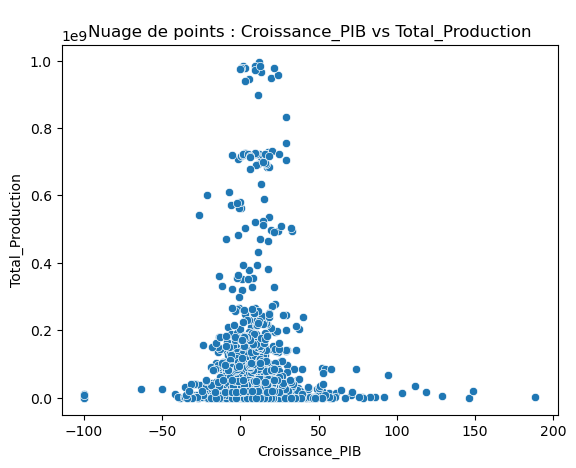

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer le nuage de points avec seaborn
sns.scatterplot(x='Croissance_PIB', y='Total_Production', data=data)

# Ajouter un titre
plt.title('Nuage de points : Croissance_PIB vs Total_Production')

# Afficher le graphique
plt.show()


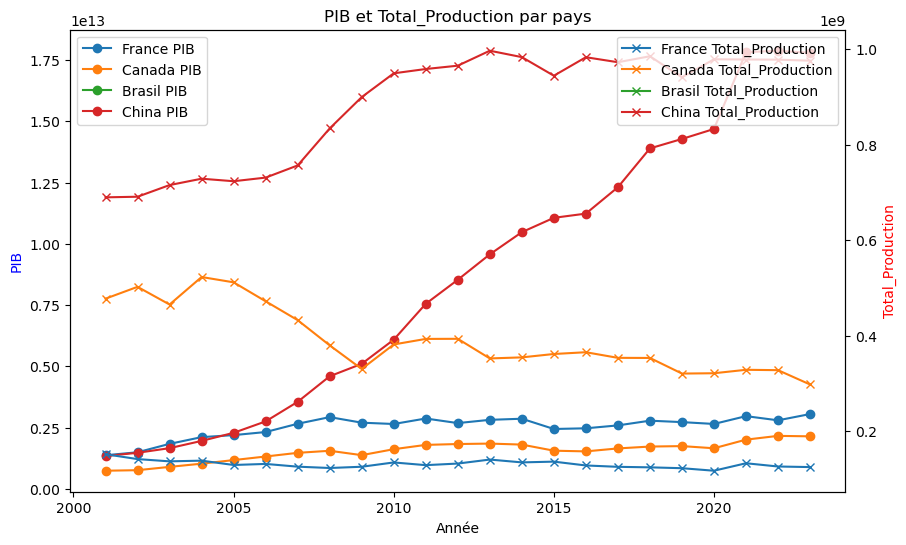

In [ ]:
import matplotlib.pyplot as plt

# Liste des pays à afficher
pays_a_afficher = ['France', 'Canada', 'Brasil', 'China']

# Filtrer le DataFrame pour ne garder que les lignes correspondant à ces pays
filtered_data = data[data['country'].isin(pays_a_afficher)]

# Créer une figure et des axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Tracer les lignes pour chaque pays (PIB sur le premier axe)
for pays in pays_a_afficher:
    # Filtrer les données pour chaque pays
    pays_data = filtered_data[filtered_data['country'] == pays]
    
    # Tracer la ligne pour PIB sur l'axe de gauche
    ax1.plot(pays_data['Year'], pays_data['PIB'], label=f'{pays} PIB', marker='o')

# Créer un deuxième axe des ordonnées pour Total_Production (axe de droite)
ax2 = ax1.twinx()

# Tracer les lignes pour Total_Production sur l'axe de droite
for pays in pays_a_afficher:
    # Filtrer les données pour chaque pays
    pays_data = filtered_data[filtered_data['country'] == pays]
    
    # Tracer la ligne pour Total_Production sur l'axe de droite
    ax2.plot(pays_data['Year'], pays_data['Total_Production'], label=f'{pays} Total_Production', marker='x')

# Ajouter des titres et des labels
ax1.set_title('PIB et Total_Production par pays')
ax1.set_xlabel('Année')
ax1.set_ylabel('PIB', color='blue')  # Axe gauche pour PIB
ax2.set_ylabel('Total_Production', color='red')  # Axe droite pour Total_Production

# Ajouter des légendes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Afficher le graphique
plt.show()



In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

# Charger les frontières des pays depuis GeoPandas (dataset intégré)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Exemple de données
data = pd.DataFrame({
    'Country': ['France', 'Germany', 'Italy', 'Spain', 'USA'] * 3,
    'Year': [2020, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022],
    'Value': [50, 80, 70, 60, 90, 55, 85, 75, 65, 95, 60, 90, 80, 70, 100]
})

# Fusionner les données avec les informations géographiques
world = world.rename(columns={'name': 'Country'})  # Renommer la colonne pour correspondre
world_with_data = world.merge(data, on='Country', how='left')

# Fonction pour afficher la carte avec un dégradé de couleurs
def plot_map(selected_year):
    # Filtrer les données pour l'année sélectionnée
    data_for_year = data[data['Year'] == selected_year]
    world_with_data = world.merge(data_for_year, on='Country', how='left')

    # Tracer la carte
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    world_with_data.plot(
        column='Value',  # Colonne pour le dégradé de couleurs
        cmap='viridis',  # Palette de couleurs
        legend=True,
        legend_kwds={'label': "Valeur par pays"},
        missing_kwds={"color": "lightgrey", "label": "Données manquantes"},
        ax=ax
    )
    ax.set_title(f"Valeurs pour l'année {selected_year}")
    plt.show()

# Affichage interactif avec un curseur d'année
interact(plot_map, selected_year=data['Year'].unique())
